<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2020 Practicum 2

***

**Name**:  Aanvi Guliani

***

**Partner Name** (if applicable): Ria Thakkar

***

*Each individual must submit a copy of this activity - even if you worked with a partner. If you worked with a partner, you and your partner should have similar / identical work on the problems below, but your name (as the submitting student) and your partner's name should be accurately represented in the fields above.*

This practicum is due on Canvas by **10:00 PM on Saturday, December 12** (the end of your Finals Period). Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions. 

**Here are the rules:** 

1. All work, code and analysis, must be your own - either alone or with your partner. 
2. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
3. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on. (There is a limited exception in Problem 2B)
4. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions in office hours or on a private Piazza post.
5. You may **NOT** post to public message boards or other online resources asking for help.
6. You may **NOT** copy-paste solutions *from anywhere*.
7. You may **NOT** collaborate with classmates or anyone else (other than your partner).
8. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.


---

In [40]:
from scipy import stats
from math import isnan
import numpy as np 
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from calendar import month_name, different_locale
import seaborn as sns

# Problem 1: Urbanization (50 pts)
It is January of 1963, and President Kennedy has hired you as the Chief Statistician for the White House!  Your first task is to analyze and report state expenditures across the country$^1$.  You feel ready for the challenge, since you studied so hard in your statistical methods class.  On day one, JFK hands you an important data set that contains information on the 48 states in the contiguous U.S. describing per capita state and local public expenditures associated with state demographic and economic characteristics in 1960$^2$ . The data set is found in the file `stateExpenditures.txt`.

You are told that you need to quantify **how per capita state and local expenditures can be explained and predicted** by:
* The economic ability index
* The percentage of the population living in a metropolitan area
* The percentage change in the population between 1950 and 1960
* The percentage of the population aged 5-19 years
* The percentage of the population over 65 years old
* Whether the state is located in the western part of the United States or not

The variables available in the data set are labeled as follows:

* EX: 		Per capita state and local public expenditures (USD)
* ECAB: 	Economic ability index, in which income, retail sales, and the value of output (manufactures, mineral, and agricultural) per capita are equally weighted
* MET: 		Percentage of population living in standard metropolitan areas
* GROW: 	Percent change in population, 1950-1960
* YOUNG: 	Percent of population aged 5-19 years
* OLD: 		Percent of population over 65 years of age
* WEST: 	Western state (1) or not (0)

Keep in mind that the president does not know how to interpret linear model output, and he wants answers in terms of things that are easily read and understood.  Therefore, when analyzing your models, *be sure your answers are friendly for a general audience, but include enough technical information that your statistics professor believes you know what you're talking about*.

$^1$ Just pretend that today's hardware and software existed in 1963 - no need to purchase a variety of vacuum tubes!

$^2$ U.S. Department of Commerce, Bureau of the Census, Government Finances in 1960, Census of Population (1960),  Census of Manufactures (1958), Statistical Abstract of the United States (1961), U.S. Department of Agriculture, Agricultural Statistics (1961), and the U.S. Department of the Interior, Minerals Yearbook (1960).

### 1A) Load Your Dataset
Load in the data set saved in "stateExpenditures.txt".  Save it into a data frame.

In [2]:
#YOUR CODE FOR 1A HERE
# read in state expenditures, name the columns (weird shifting problem) and then drop the first row with old headers
df1 = pd.read_csv('stateExpenditures.txt',sep='\t',names=['EX','ECAB','MET','GROW','YOUNG','OLD','WEST','STATE'])
df1 = df1.iloc[1:]
df1.head()

,EX,ECAB,MET,GROW,YOUNG,OLD,WEST,STATE
1,256,85.5,19.7,6.9,29.6,11.0,0.0,ME
2,275,94.3,17.7,14.7,26.4,11.2,0.0,NH
3,327,87.0,0.0,3.7,28.5,11.2,0.0,VT
4,297,107.5,85.2,10.2,25.1,11.1,0.0,MA
5,256,94.9,86.2,1.0,25.3,10.4,0.0,RI


### 1B) Consider Variable Nonlinearity
The effects of the metrolpolitan variables are highly nonlinear!  One way to approach this is to consider it as a categorical variables instead.  Convert MET to a categorical variable $METcateg$ that denotes which level MET each state is in by dividing MET up into units of 15:

Set METcateg equal to
  \begin{array}{l l}
    METcateg=1 & \quad \text{if $MET < 15$}\\
    METcateg=2 & \quad \text{if $15 \le MET < 30$}\\
    METcateg=3 & \quad \text{if $30 \le MET < 45$}\\
    METcateg=4 & \quad \text{if $45 \le MET < 60$}\\
    METcateg=5 & \quad \text{if $60 \le MET < 75$}\\
    METcateg=6 & \quad \text{if $75 \le MET$}\\    
  \end{array} 

In [3]:
#YOUR CODE FOR 1B HERE
#instantiate new column called metcateg and initialize to 0
#iterate through rows and update based on value of MET
df1['METcateg'] = 0
for index, row in df1.iterrows():
    metvar = float(row['MET'])
    if metvar < 15:
        df1.at[index,'METcateg'] = 1
    elif metvar >= 15 and metvar < 30:
        df1.at[index,'METcateg'] = 2
    elif metvar >= 30 and metvar < 45:
        df1.at[index,'METcateg'] = 3
    elif metvar >= 45 and metvar < 60:
        df1.at[index,'METcateg'] = 4
    elif metvar >= 60 and metvar < 75:
        df1.at[index,'METcateg'] = 5
    elif metvar >= 75:
        df1.at[index,'METcateg'] = 6
df1.head()

,EX,ECAB,MET,GROW,YOUNG,OLD,WEST,STATE,METcateg
1,256,85.5,19.7,6.9,29.6,11.0,0.0,ME,2
2,275,94.3,17.7,14.7,26.4,11.2,0.0,NH,2
3,327,87.0,0.0,3.7,28.5,11.2,0.0,VT,1
4,297,107.5,85.2,10.2,25.1,11.1,0.0,MA,6
5,256,94.9,86.2,1.0,25.3,10.4,0.0,RI,6


### 1C) Visualize Your Covariates
Make pairwise scatter plots of the continuous covariates, both against each other and against the outcome (expenditures).   Does the relationship between the independent variables and the dependent variables appear to be linear?  Do there appear to be independent variables that are collinear?  You may import the package `seaborn` if desired.

Using seaborn's pairplot function, we can visualize the relationship between each of the variables. Out of all of the continuous covariates, Economic Ability Index, Percent Population in Metro Areas, and Population Growth (ECAB,MET,GROW) seem to have strong linear relationships with Expenditures, while percent population of young/old people (YOUNG,OLD) seem to have a nonlinear relationship with expenditure.  

When we look at the continuous covariates plotted against each other, we found a few things. ECAB, GROW, and MET seem to have linear relationships with each other (ie ECAB vs GROW, GROW vs MET, MET vs. ECAB, etc).In general, the continuous covariates that had a linear relationship with expenditure also seem to have a linear relationship with each other.On the other hand, the continuous covariates that did not show a linear relationship with Expenditures don't seem to have a linear relationship with any of the continuous covariates. 

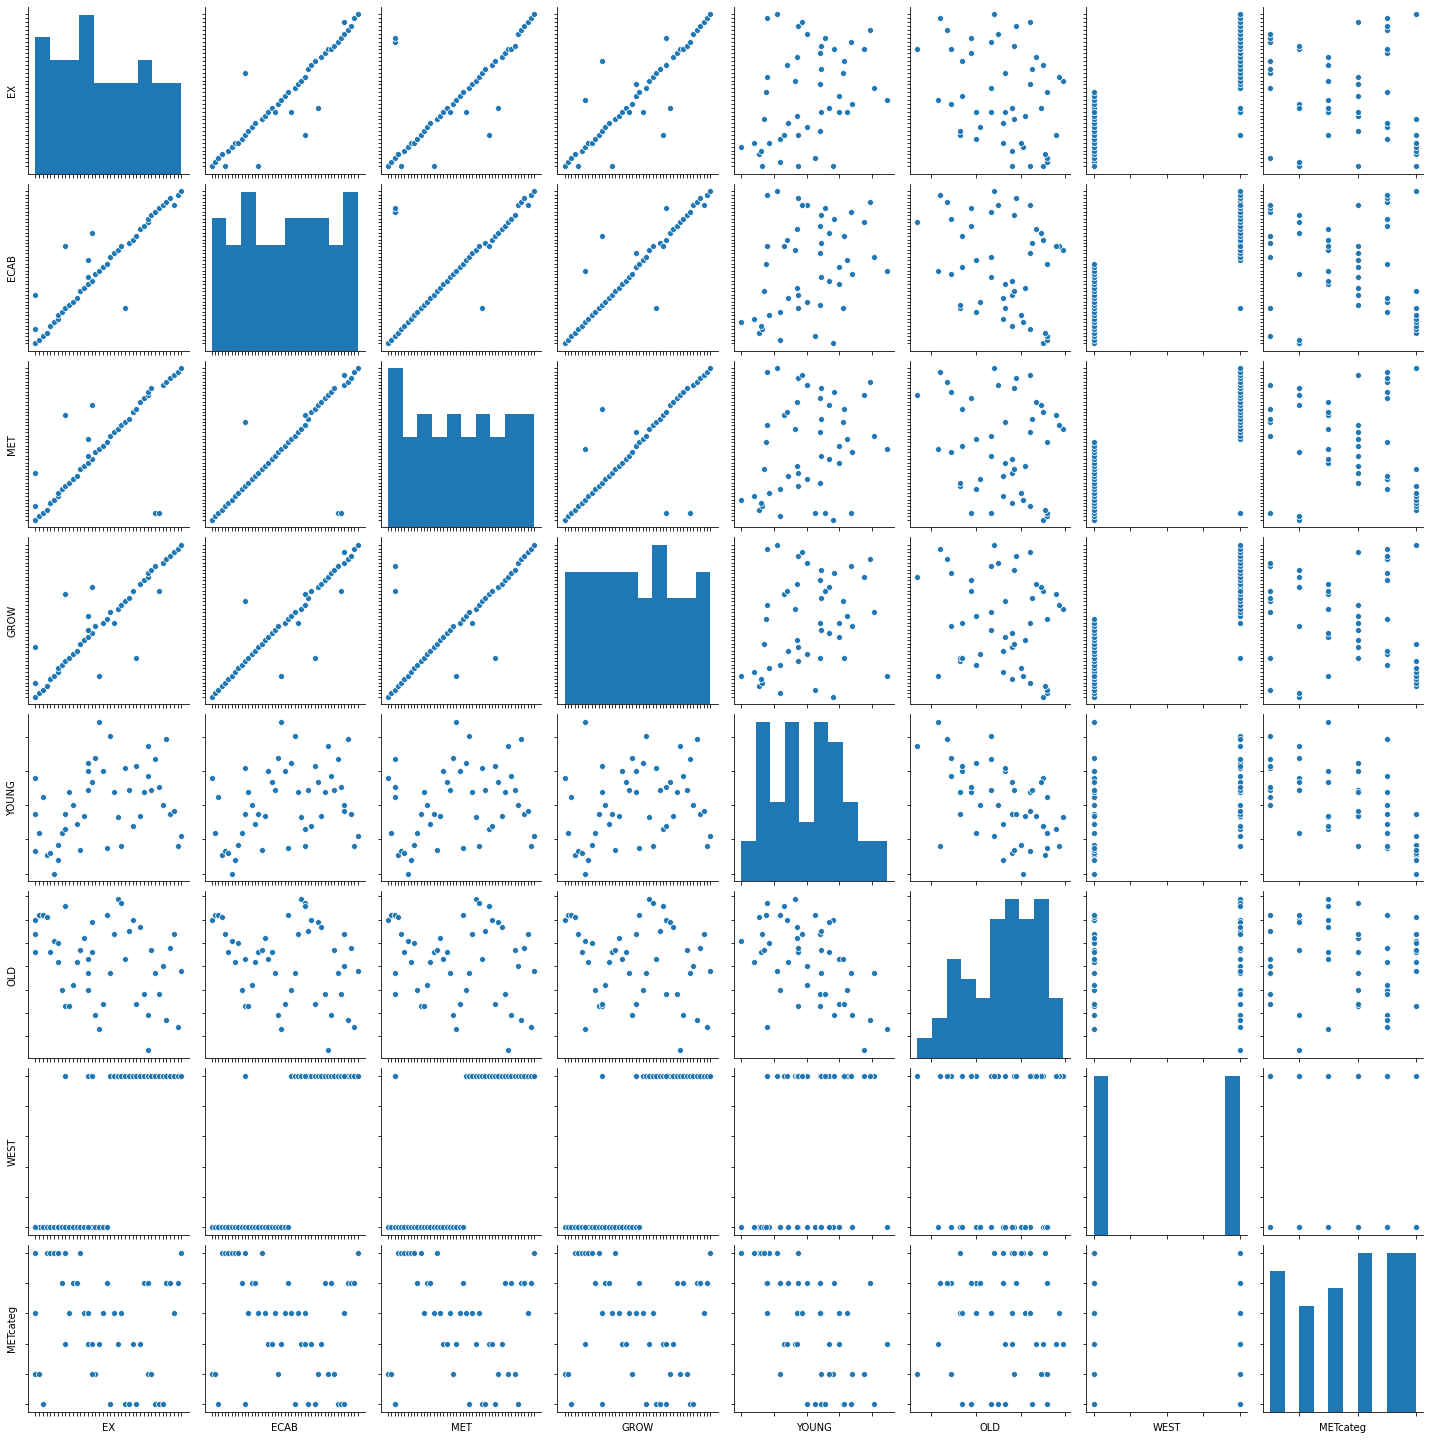

In [4]:
scatter = sns.pairplot(df1)
scatter.set(xticklabels=[],yticklabels=[])

### 1D) Run Your Full Model
Fit the full model using `stats.OLS` in Python.  Then in a markdown cell, write out the estimated full model, adjusted $R^2$ value, and interpret the parameters in sentences with appropriate units.

In [5]:
#YOUR CODE FOR 1D HERE
# Collect the features in a 2D array 
X = df1[["ECAB", "MET", "GROW",'YOUNG','OLD','WEST']].astype(float)


# Add a constant to the array for the intecept 
X = sm.add_constant(X)

# Collect the response data in an array 
y = df1["EX"].astype(float)

# Fit the ordinary least-squares (OLS) model 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EX   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     10.22
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.63e-07
Time:                        15:16:36   Log-Likelihood:                -241.20
No. Observations:                  48   AIC:                             496.4
Df Residuals:                      41   BIC:                             509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.1818    306.486      1.162      0.252    -262.780     975.143
ECAB           1.4185      0.430      3.298      0.002       0.550       2.287
MET           -0.6602      0.353     -1.872      0.068      -1.372       0.052
GROW           0.5716      0.425      1.345      0.186      -0.287       1.430
YOUNG         -6.6747      7.481     -0.892      0.377     -21.782       8.433
OLD           -1.8551      7.137     -0.260      0.796     -16.268      12.558
WEST          35.4723     13.771      2.576      0.014       7.661      63.284
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.524
Skew:                           0.253   Prob(JB):                        0.770
Kurtosis:                       2.927   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [6]:
print(model.params)

const    356.181848
ECAB       1.418502
MET       -0.660153
GROW       0.571590
YOUNG     -6.674659
OLD       -1.855073
WEST      35.472336
dtype: float64


Based on the code output, the full model is as follows:  
$$
\texttt{EX} = 356.182 + (1.419 \times \texttt{ECAB}) - (0.66 \times \texttt{MET}) + (0.572 \times \texttt{GROW}) - (6.675 \times \texttt{YOUNG}) - (1.855 \times \texttt{OLD}) + (35.472 \times \texttt{WEST})
$$  
  
The $R^2$ value is 0.541. This means that approximately 54.1% of the variance in expenditures can be attributed to our model.


### 1E) Run a Modified Full Model
Fit a "full" model that includes ECAB, METcateg, GROW, YOUNG, OLD, and WEST.  Write out the estimated model in a markdown cell afterwards.

In [7]:
#YOUR CODE FOR 1E HERE
# Collect the features in a 2D array 
X2 = df1[["ECAB", "METcateg", "GROW",'YOUNG','OLD','WEST']].astype(float)


# Add a constant to the array for the intecept 
X2 = sm.add_constant(X2)

# Collect the response data in an array 
y2 = df1["EX"].astype(float)

# Fit the ordinary least-squares (OLS) model 
model2 = sm.OLS(y2, X2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EX   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     10.28
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.24e-07
Time:                        15:16:36   Log-Likelihood:                -241.13
No. Observations:                  48   AIC:                             496.3
Df Residuals:                      41   BIC:                             509.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        354.9784    303.417      1.170      0.249    -257.785     967.741
ECAB           1.4235      0.428      3.326      0.002       0.559       2.288
METcateg     -10.2371      5.361     -1.910      0.063     -21.063       0.589
GROW           0.5515      0.424      1.302      0.200      -0.304       1.407
YOUNG         -6.3963      7.323     -0.873      0.388     -21.186       8.393
OLD           -1.6960      7.057     -0.240      0.811     -15.948      12.556
WEST          33.2001     13.860      2.395      0.021       5.209      61.192
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.682   Jarque-Bera (JB):                0.436
Skew:                           0.233   Prob(JB):                        0.804
Kurtosis:                       3.034   Cond. No.                     5.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$\hat y = 354.97 + (-10.24 * METcateg) * (1.4235 * ECAB) * (-1.696 * OLD) * (-6.3963 * YOUNG) * (.55 * GROW) * (33.2 * WEST)$


### 1F) Reduce Your Model
Perform *backwards selection* on this model.  Starting with the full model created in part 1D): remove the predictor with the highest p-value, and re-calculate the model without that predictor.  Continue this process until there are no predictors left with p-values greater than 0.05.  Write out your final estimated model. 

In [8]:
#YOUR CODE FOR 1F HERE
# repaste the full model in 1D for starting point# Collect the features in a 2D array 
X3 = df1[["ECAB", "MET", "GROW",'YOUNG','OLD','WEST']].astype(float)


# Add a constant to the array for the intecept 
X3 = sm.add_constant(X3)

# Collect the response data in an array 
y3 = df1["EX"].astype(float)

# Fit the ordinary least-squares (OLS) model 
model3 = sm.OLS(y3, X3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EX   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     10.22
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           6.63e-07
Time:                        15:16:36   Log-Likelihood:                -241.20
No. Observations:                  48   AIC:                             496.4
Df Residuals:                      41   BIC:                             509.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        356.1818    306.486      1.162      0.252    -262.780     975.143
ECAB           1.4185      0.430      3.298      0.002       0.550       2.287
MET           -0.6602      0.353     -1.872      0.068      -1.372       0.052
GROW           0.5716      0.425      1.345      0.186      -0.287       1.430
YOUNG         -6.6747      7.481     -0.892      0.377     -21.782       8.433
OLD           -1.8551      7.137     -0.260      0.796     -16.268      12.558
WEST          35.4723     13.771      2.576      0.014       7.661      63.284
==============================================================================
Omnibus:                        0.723   Durbin-Watson:                   2.349
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.524
Skew:                           0.253   Prob(JB):                        0.770
Kurtosis:                       2.927   Cond. No.                     6.18e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
#YOUR CODE FOR 1F HERE
# first drop OLD since it has the highest p-val of .796
Xr = df1[["ECAB", "MET", "GROW",'YOUNG','WEST']].astype(float)
Xr = sm.add_constant(Xr)
yr = df1["EX"].astype(float)
modelr = sm.OLS(yr, Xr).fit()
#modelr.summary()
# now YOUNG has the highest p-value of .227, so drop that
Xr1 = df1[['ECAB', 'MET', 'GROW','WEST']].astype(float)
Xr1 = sm.add_constant(Xr1)
yr1 = df1["EX"].astype(float)
modelr1 = sm.OLS(yr1, Xr1).fit()
#modelr1.summary()
# now GROW has the highest p-value of .171, so drop that
Xr2 = df1[["ECAB", 'MET','WEST']].astype(float)
Xr2 = sm.add_constant(Xr2)
yr2 = df1["EX"].astype(float)
modelr2 = sm.OLS(yr2, Xr2).fit()
#modelr2.summary()
# finally, MET has the highest p-value of .229, so drop that
Xr3 = df1[["ECAB",'WEST']].astype(float)
Xr3 = sm.add_constant(Xr3)
yr3 = df1["EX"].astype(float)
modelr3 = sm.OLS(yr3, Xr3).fit()
modelr3.summary()
# now all predictors have a p-value < 0.05 - final model shown below

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     EX   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     27.61
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.50e-08
Time:                        15:16:36   Log-Likelihood:                -243.94
No. Observations:                  48   AIC:                             493.9
Df Residuals:                      45   BIC:                             499.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.2957     26.625      3.842      0.000      48.671     155.921
ECAB           1.6962      0.264      6.422      0.000       1.164       2.228
WEST          40.4759     11.633      3.480      0.001      17.047      63.905
==============================================================================
Omnibus:                        0.960   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.619   Jarque-Bera (JB):                0.742
Skew:                           0.301   Prob(JB):                        0.690
Kurtosis:                       2.911   Cond. No.                         456.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$$
\texttt{EX} = 102.2957 + (1.6962 \times \texttt{ECAB}) + (40.4759 \times \texttt{WEST})
$$

###  1G) Compare Your Models
Perform a hypothesis test to determine if the predictors removed from the full model from part 1D) to create the model in 1F) should be kept in the model.  Provide the hypothesis, perform the test, and state the conclusions using p-values.  Be sure to provide your answer in terms of the original problem, and interpret the parameters.

For each variable that we removed in the reduced model, we will conduct a t-test to find our whether the predictor is significant. If the associated p-value < 0.05, we reject the null hypothesis and have enough evidence to conclude that the relationship between the predictor and expenditures is real.

**Hypothesis Test for "OLD"**  
The first predictor we removed from our model is population of old people. Our null and alternative hypothesis are as follows:    
$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$    
Now, we conduct a t-test to find our associated p-values. If our p-value < $\alpha$, we reject the null hypothesis and have enough evidence to conclude that the relationship between percent population of old people and expenditures is real.

In [10]:
#YOUR CODE FOR 1G HERE
#for each variable removed, conduct a t-test to see if the relationship is real
#create function to calculate p-values since we will calculate these values multiple times
def calcP(bhat,SEbeta):
    Tb = (bhat - 0)/SEbeta
    if bhat < 0:
        Tb = Tb * -1
    tpval = 2*(1-stats.t.cdf(Tb, df=len(df1)-2))
    return tpval
print("p-value for OLD:",calcP(-1.8551,7.137))

p-value for OLD: 0.7960798813901362


As we can see from the code output above, our p-value 0.796 > $\alpha$, so we fail to reject the null hypothesis. We do not have enough evidence to conclude that the relationship between percent population of old people and expenditure is real.

**Hypothesis Test for "YOUNG"**  
The next predictor we removed is the percent population of young people. Our null and alternative hypothesis are as follows:    
$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$    
Now, we conduct a t-test to find our associated p-values. If our p-value < $\alpha$, we reject the null hypothesis and have enough evidence to conclude that the relationship between percent population of young people and expenditures is real.

In [11]:
print("p-value for YOUNG:",calcP(-6.6747,7.481))

p-value for YOUNG: 0.37691858627001773


As we can see from the code output above, our p-value 0.378 > $\alpha$, so we fail to reject the null hypothesis. We do not have enough evidence to conclude that the relationship between percent population of young people and expenditure is real.

**Hypothesis Test for "GROW"**  
The next predictor we removed is the population growth. Our null and alternative hypothesis are as follows:    
$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$    
Now, we conduct a t-test to find our associated p-values. If our p-value < $\alpha$, we reject the null hypothesis and have enough evidence to conclude that the relationship between population growth and expenditures is real.

In [12]:
print("p-value for GROWTH:",calcP(0.5716,0.425))

p-value for GROWTH: 0.18523808857247848


As we can see from the code output above, our p-value 0.185 > $\alpha$, so we fail to reject the null hypothesis. We do not have enough evidence to conclude that the relationship between population growth and expenditure is real.

**Hypothesis Test for "MET"**  
The last predictor we removed is the percent population in metro areas. Our null and alternative hypothesis are as follows:    
$$
H_0: \beta = 0 \\
H_1: \beta \neq 0 
$$    
Now, we conduct a t-test to find our associated p-values. If our p-value < $\alpha$, we reject the null hypothesis and have enough evidence to conclude that the relationship between percent population in metro areas and expenditures is real.

In [13]:
print("p-value for MET:",calcP(-6.6747,7.481))

p-value for MET: 0.37691858627001773


As we can see from the code output above, our p-value 0.377 > $\alpha$, so we fail to reject the null hypothesis. We do not have enough evidence to conclude that the relationship between percent population of young people and expenditure is real.

### 1H) Explore A Different Model
Your model in 1F should still include at least some of the levels of MET.  Suppose we removed these, and instead only included the *other* terms. 

- First, make a plot of the residuals of this no-MET model (y) against the *continuous* values of MET (x) from the original problem.
- Before running any code, describe what kinds of *continuous* nonlinear functions or transformations might have captured this type of response.
- Then, implement a polynomial regression capturing the effect of MET while including the same non-MET terms as you did in 2f.
- Plot the residuals of the polynomial regression multiple linear model against the continuous predictor MET, and argue why you've included enough polynomial terms to satisfy any relevant modeling assumptions.

Below is the plot of the residuals of our no-MET model on the y axis and our continuous MET on the x axis. If the data was linear, the residuals would be randomly distributed about 0. Howver, the residuals look very slightly parabolic, suggesting that the degree of MET might be 2 instead of 1 $(X^2$ vs $X)$.

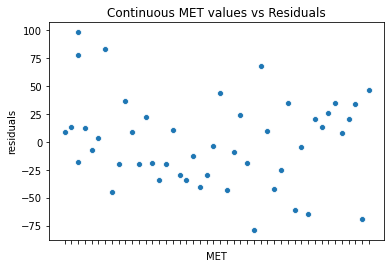

In [14]:
#YOUR CODE FOR 1H HERE
#modelr3 holds the data for our no-met model
#Xr3 = x data
#yr3 = y data
yhat = modelr3.predict(Xr3)
res = yr3 - yhat
scatter1h = sns.scatterplot(df1['MET'], res)
scatter1h.set(xticklabels=[],ylabel='residuals',title='Continuous MET values vs Residuals')
plt.show()

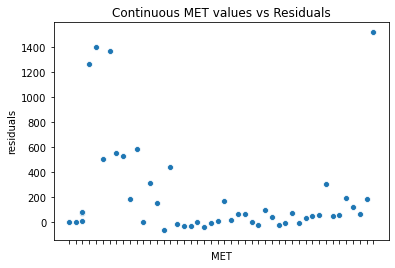

In [50]:
#use the model with continuous MET for polynomial regression
#Xr2 and yr2
#df1[["ECAB", 'MET','WEST']].astype(float)
XP = np.column_stack((df1['ECAB'].astype(float), df1['MET'].astype(float)**(9),df1['WEST'].astype(float)))
yPoly = df1["EX"].astype(float)
# Add a constant to the array for the intecept 
XPoly = sm.add_constant(XP)

# Fit the ordinary least-squares (OLS) model 
polymodel = sm.OLS(yPoly, XPoly).fit()

# Print estimated parameters 
#print(polymodel.summary())
yhatPoly = polymodel.predict(XPoly)
resPoly = yPoly - yhatPoly
scatter2h = sns.scatterplot(df1['MET'], resPoly)
scatter2h.set(xticklabels=[],ylabel='residuals',title='Continuous MET values vs Residuals')
plt.show()

We chose the polynomial degree $X^9$ because the p-values associated with each of the terms when we print out the polymodel summary indicate that the model is significant. 


### 1I) Favorite Model
Between all the models above (full model, backwards selection, continuous MET) pick your favorite, and interpret all the parameters.  Why is this model your favorite?  Be sure to provide interpretations in terms of the original problem, including the original scale of the dependent and independent variables.

Out of all of these, my favorite model is backwards selection, which says that if we implement a linear model, we can use independent variables economic ability index and the binary variable representing whether it's a western state can predict the state's expenditures. The full model is as follows:


$$
\texttt{EX} = 102.2957 + (1.6962 \times \texttt{ECAB}) + (40.4759 \times \texttt{WEST})
$$     

The $R^2$ value is 0.531, which means that 53.1% of the variation in Expenditures can be attributed to ECAB and WEST. 

This is my favorite model because it takes into account the p-values associated with the parameters. It actually makes sure whether or not the parameter is significant in the linear model.

## Problem 2: Amazon Forest Fires
Now that you have shown yourself to be an expert in understanding and managing forest fire risk, a non-profit trying to protect the amazon rain forest has recruited you to join their data science corps. For your first task, they've given you a dataset (`amazon.csv`) with the number of reported forest fires in each state in the Amazon region of Brazil during each month between 1998 and 2017. The Brazilian government has 500 extra wildland firefighters and they have asked your non-profit to determine which state or states they should allocate these firefighters to during each month of the year. To do this, they want you to calculate an 80% confidence interval for the mean and median number of fires that occur during each month for each state, and use those statistics to determine where the firefighters should be assigned.

### A) Loading The CSV
Read the csv located in `amazon.csv` into a pandas data frame. Brazil and many other countries use the period (.) symbol as a thousands separator and a comma (,) as the decimal separator. Ex. One Thousand And $\frac{75}{100}$ would be represented as $1.000,75$ instead of the familiar english notation $1,000.75$. When you read it in, you'll need to use a period(.) as the thousands separator and a comma(,) as the decimal separator. Because the comma is already in use as the decimal separator, this file uses a different character to separate columns in the data. Open up the file in a text editor and figure out what character was used. Then find the correct arguments to `pd.read_csv` to read in this file properly. Look up the docs if you're unsure what the arguments you'll need are. Print out the `.info` summary of the dataframe after you've read it in.

In [16]:
#2A CODE HERE
# semi colon was used as a separator
amazon_fires = pd.read_csv('amazon.csv',sep=';')
amazon_fires.info()
#amazon_fires.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6453 non-null   object
 1   state   6452 non-null   object
 2   month   6454 non-null   object
 3   number  6448 non-null   object
 4   date    6450 non-null   object
dtypes: object(5)
memory usage: 252.2+ KB


### Part B: Data Cleaning

This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks. 
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. Use the `.info` summary provided to check your work.
2. Drop any rows with null values in any of the remaining columns. Use the provided code to print the number of rows remaining after this step.
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
4. Convert the Portugese month names to English month names. If you'd like to use them, we've included the 'month_name' and the 'different_encoding' modules of the python calendar library. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct english month. Use the `.unique` method provided for you to check your work. 
5. Check the number column for any values that seem impossible. If you find any values you think are impossible, drop them. As a guidline, we would never expect a single state to have more than 50,000 reported forest fires in a single month. Also keep in mind that we are tracking forest fires here. Do negative or fractional forest fires really make sense? You should check for any obivously impossible conditions that you think might occur, and drop rows accordingly. Use the provided code to print the number of rows remaining after this step.
6. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense. Use the provided code to print the number of rows remaining after this step.
7. For every state in the data, print the number of rows the state has associated with it. A number of states have far more observations than the others. Each state should have roughly 240 observations (20 years multiplied by 12 months/year minus any bad data). Drop all the observations for any states that have more than 240 rows associated with them.
    2. For two points of extra credit, figure out why these states have way more rows associated with them than they should. If you choose to do the extra credit, put your answer in the markdown cell below. 
8. To give you an idea of whether your answer is correct, we've provided a unit test below the last cell. It should pass. If it doesn't, go back and figure out which step has gone awry.

We've given you a code cell for each task to make organizing the grading a bit easier. Please perform step 1 in the first code cell and so on.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may only work with your partner for help, no other classmates. We will also be more helpful on this problem in office hours and in response to your *private* piazza messages.  ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM.***

In [17]:
#2B Step 1 CODE HERE
#ref for dropping cols: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html
amazon_fires = amazon_fires.drop(columns=['date'])
#amazon_fires.head()
amazon_fires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    6453 non-null   object
 1   state   6452 non-null   object
 2   month   6454 non-null   object
 3   number  6448 non-null   object
dtypes: object(4)
memory usage: 201.8+ KB


In [18]:
#2B Step 2 CODE HERE
# ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
amazon_fires = amazon_fires.dropna()
print(len(amazon_fires))

6446


In [19]:
#2B Step 3 CODE HERE
# ref: the code given in the next step lol
print(amazon_fires['month'].unique())

['Janeiro' 'Fevereiro' 'Mar�o' 'Abril' 'Maio' 'Junho' 'Julho' 'Agosto'
 'Setembro' 'Outubro' 'Novembro' 'Dezembro']


In [20]:
#2B Step 4 CODE HERE
#ref: https://stackoverflow.com/questions/23330654/update-a-dataframe-in-pandas-while-iterating-row-by-row
# iterate through the rows and use if-else statement to convert. 
# for march, just have that as the else to avoid the encoding problem
for index, row in amazon_fires.iterrows():
    month = row['month']
    if month == 'Janeiro':
        amazon_fires.at[index,'month'] = 'January'
    elif month == 'Fevereiro':
        amazon_fires.at[index,'month'] = 'February'
    elif month == 'Abril':
        amazon_fires.at[index,'month'] = 'April'
    elif month == 'Maio':
        amazon_fires.at[index,'month'] = 'May'
    elif month == 'Junho':
        amazon_fires.at[index,'month'] = 'June'
    elif month == 'Julho':
        amazon_fires.at[index,'month'] = 'July'
    elif month == 'Agosto':
        amazon_fires.at[index,'month'] = 'August'
    elif month == 'Setembro':
        amazon_fires.at[index,'month'] = 'September'
    elif month == 'Outubro':
        amazon_fires.at[index,'month'] = 'October'
    elif month == 'Novembro':
        amazon_fires.at[index,'month'] = 'November'
    elif month == 'Dezembro':
        amazon_fires.at[index,'month'] = 'December'
    else:
        amazon_fires.at[index,'month'] = 'March'
print(amazon_fires['month'].unique())

['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [21]:
#2B Step 5 CODE HERE
#ref: https://stackoverflow.com/questions/3501382/checking-whether-a-variable-is-an-integer-or-not
#for boolean filtering, I used the same method I used in practicum 1 (not sure where I found that method)
#I filtered for number of fires > 50000 - based on this article: https://www.bbc.com/news/world-latin-america-53893161

#create a column called isReasonable, which will be a boolean that represents whether the number of fires is reasonable
#we will drop this later
#for each row, if the value of the number of fires isn't reasonable, change the value to false - then filter based on this
amazon_fires['isReasonable'] = False
for index, row in amazon_fires.iterrows():
    #print(row['number'])
    numFires = float(row['number'].replace('.','').replace(',','.'))
    #print(numFires)
    if numFires >= 0 and numFires <= 50000 and numFires.is_integer():
        amazon_fires.at[index,'isReasonable'] = True
        #print("hi")
helperBool = amazon_fires['isReasonable'] == True
amazon_fires = amazon_fires[helperBool]
#drop isReasonable
amazon_fires = amazon_fires.drop(columns=['isReasonable'])
print(len(amazon_fires))

6441


In [22]:
#2B Step 6 CODE HERE
print(amazon_fires['year'].unique())
bc = amazon_fires['year'] != '1000bc'
neg40 = amazon_fires['year'] != '-40'
bc10 = amazon_fires['year'] != '10bc'
notice = amazon_fires['year'] != "our new data scientist won't notice this"
amazon_fires = amazon_fires[bc & neg40 & bc10 & notice]
print(len(amazon_fires))

['1998' '1999' '2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007'
 '2008' '2009' '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017'
 '1000bc' '-40' '10bc' "our new data scientist won't notice this"]
6437


In [23]:
#2B Step 7 CODE HERE
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.iteritems.html
#ref:https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/
df_helper = amazon_fires.groupby(['state'], sort=False).size()
print(df_helper)
for state, value in df_helper.items():
    if(value > 240):
        indexNames = amazon_fires[ amazon_fires['state'] == state ].index
        amazon_fires.drop(indexNames , inplace=True)

state
Acre                239
Alagoas             240
Amapa               239
Amazonas            239
Bahia               239
Ceara               239
Distrito Federal    239
Espirito Santo      238
Goias               238
Maranhao            239
Mato Grosso         476
Minas Gerais        237
Para                235
Paraiba             474
Pernambuco          239
Piau                239
Rio                 715
Rondonia            239
Roraima             239
Santa Catarina      238
Sao Paulo           239
Sergipe             239
Tocantins           239
dtype: int64


In [24]:
#2B UNIT TEST
assert \
    len(amazon_fires['state'].unique()) == 20 and \
    list(amazon_fires['month'].unique()) == \
        ['January', 'February', 'March', 'April', 'May', 'June',
             'July', 'August','September', 'October', 'November',
             'December'] and \
    len(amazon_fires) == 4772, 'something is wrong in part B.'

The reason some states have significantly more entries than others is because the one's with more entries have different entries for the same day. For example, the state Paraiba has 474 entries with data from January 1998 to December 2017. The data starts with all of the January entries 1998-2017 then the February entries and so on. However instead of stopping at December it repeats January entries again onwards. This would be fine if the entries were the same, [number] column has different values for entries supposedly on the same day.

### Part C: Medians and Means!
In this part of the problem, we'll calculate an 80% confidence interval for both the mean and median number of wildfires each state has during each month of the year. 

For the mean you should use the appropriate confidence interval with the correct distribution. Remember to check how many observations we have. Use the sample standard deviation. 

For the median, we'll have to bootstrap it because the median is not known to be normally distributed. You should bootstrap 1000 samples of the same length as the original sample for each month for each state. Calculate the median for each bootstrapped sample. Then take the middle 80% of the bootstrapped medians as your confidnce interval. This is called a bootstrapped percentile median. There are a few more complex and slightly more rigourous ways to estimate the median from bootstrapped samples, but this will serve for our purposes.

You're given a dictionary of dictionaries to store your confidence intervals for the medians and means in. 

Take a look at the dictionary structure below. 

The idea here is that for every month, for every state, you will fill in the `mean_CI` with a length two list that contains the low and high end of the confidence interval for the true mean number of fires for that state in that month. 

Similiarly, for every month, for every state, you will fill in the `median_CI` with a length two list that contains the low and high end of the confidence interval for the true median number of fires for that state in that month.

For example:

When you're done `months['January']['Acre']['mean_CI']` should be a list with the low and high bounds for the confidence interval of the true mean number of wildfires in the state of Acre in January. So `months['January']['Acre']['mean_CI'][0]` should be the low end of the CI for the mean, and `months['January']['Acre']['mean_CI'][1]` should be the high end of the CI for the mean.

`months['January']['Acre']['median_CI']` should hold the confidence interval for the true median number of wildfires in the state of Acre in January. So `months['January']['Acre']['median_CI'][0]` should be the low end of the CI for the median, and `months['January']['Acre']['median_CI'][1]` should be the high end of the CI for the median.

In [25]:
#GIVEN CODE DO NOT CHANGE THIS!!!
#YOU SHOULD BE WRITING CODE IN THE NEXT CELL(s) THAT FILLS IN THE 'months' DICTIONARY.

#If you're curious what copy and deep copy do and why we used them here see an explanation 
#here: https://thispointer.com/python-how-to-copy-a-dictionary-shallow-copy-vs-deep-copy/

from copy import deepcopy

mean_median_dict ={
    'mean_CI' : None,
    'median_CI': None
}

CI_median_num_fires = {
    'Acre': dict(mean_median_dict),
    'Alagoas':dict( mean_median_dict),
    'Amapa':dict( mean_median_dict),
    'Amazonas':dict( mean_median_dict),
    'Bahia':dict( mean_median_dict),
    'Ceara':dict( mean_median_dict),
    'Distrito Federal':dict( mean_median_dict),
    'Espirito Santo':dict( mean_median_dict),
    'Goias':dict( mean_median_dict),
    'Maranhao':dict( mean_median_dict),
    'Minas Gerais':dict( mean_median_dict),
    'Para':dict( mean_median_dict),
    'Pernambuco':dict( mean_median_dict),
    'Piau':dict( mean_median_dict),
    'Rondonia':dict( mean_median_dict),
    'Roraima':dict( mean_median_dict),
    'Santa Catarina':dict( mean_median_dict),
    'Sao Paulo':dict( mean_median_dict),
    'Sergipe':dict( mean_median_dict),
    'Tocantins':dict( mean_median_dict)  
}

months = {
    'January': deepcopy(CI_median_num_fires),
    'February': deepcopy(CI_median_num_fires),
    'March': deepcopy(CI_median_num_fires), 
    'April': deepcopy(CI_median_num_fires), 
    'May': deepcopy(CI_median_num_fires),
    'June': deepcopy(CI_median_num_fires),
    'July': deepcopy(CI_median_num_fires),
    'August': deepcopy(CI_median_num_fires), 
    'September': deepcopy(CI_median_num_fires), 
    'October': deepcopy(CI_median_num_fires),
    'November': deepcopy(CI_median_num_fires),
    'December': deepcopy(CI_median_num_fires)
}

In [26]:
#2C YOUR CODE HERE
#ref: nb18 / nb14
#ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_numpy.html
#ref: https://www.w3schools.com/python/gloss_python_change_dictionary_item.asp
#ref: https://numpy.org/doc/stable/reference/generated/numpy.std.html
def bootstrapped_median(sample, num_boots=1000):
    b = np.array([np.median(np.random.choice(sample, replace=True, size=len(sample))) for ii in range(num_boots)])
    L, U = np.percentile(b, 10), np.percentile(b, 90)
    CI = np.array([L, U])
    return CI

def mean_CI(sample):
    #x +- taover2 * (S/sqrtn)
    #alpha is .2 so alpha/2 is .1 and 1-(alpha/2) is .9
    x_bar = np.mean(sample)
    sd = np.sqrt(sum((x - x_bar)**2 / (len(sample) - 1) for x in sample))
    sqrtn = np.sqrt(len(sample))
    t = stats.t.ppf(.90,len(sample)-1)
    L = x_bar - (t*sd/sqrtn)
    U = x_bar + (t*sd/sqrtn)
    CI = np.array([L, U])
    return CI 

allStates = amazon_fires['state'].unique()
allMonths = amazon_fires['month'].unique()
for i in range(0,len(allStates)):
    for j in range(0,len(allMonths)):    
        isState = amazon_fires['state'] == allStates[i]
        isMonth = amazon_fires['month']== allMonths[j]
        sample = amazon_fires[isState & isMonth]['number'].to_numpy().astype(np.float)
        CI_med = bootstrapped_median(sample)
        CI_mean = mean_CI(sample)
        months[allMonths[j]][allStates[i]]['median_CI'] = CI_med
        months[allMonths[j]][allStates[i]]['mean_CI'] = CI_mean
        
        

In [27]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(months)

{'April': {'Acre': {'mean_CI': array([0.7631703, 3.3368297]),
                    'median_CI': array([0., 1.])},
           'Alagoas': {'mean_CI': array([ 7.9791892, 16.5208108]),
                       'median_CI': array([ 4.5, 16. ])},
           'Amapa': {'mean_CI': array([0.34123839, 0.95876161]),
                     'median_CI': array([0., 0.])},
           'Amazonas': {'mean_CI': array([ 6.97370407, 12.22629593]),
                        'median_CI': array([ 3.5 , 11.55])},
           'Bahia': {'mean_CI': array([ 93.89626654, 157.10373346]),
                     'median_CI': array([ 76. , 128.5])},
           'Ceara': {'mean_CI': array([2.69500497, 4.90499503]),
                     'median_CI': array([2., 4.])},
           'Distrito Federal': {'mean_CI': array([0.62668182, 1.87331818]),
                                'median_CI': array([0., 1.])},
           'Espirito Santo': {'mean_CI': array([ 7.39426002, 19.20573998]),
                              'median_CI': array([2.5, 

             'Pernambuco': {'mean_CI': array([321.07483025, 433.72516975]),
                            'median_CI': array([265., 408.])},
             'Piau': {'mean_CI': array([-12.44684712, 108.44724712]),
                      'median_CI': array([2.2375, 2.6775])},
             'Rondonia': {'mean_CI': array([ 77.54718415, 255.69091585]),
                          'median_CI': array([1.864, 3.094])},
             'Roraima': {'mean_CI': array([ 63.93320867, 102.36679133]),
                         'median_CI': array([58. , 94.5])},
             'Santa Catarina': {'mean_CI': array([ 85.35992972, 204.04007028]),
                                'median_CI': array([ 48.5, 102. ])},
             'Sao Paulo': {'mean_CI': array([261.71837518, 406.38162482]),
                           'median_CI': array([191.5, 327.5])},
             'Sergipe': {'mean_CI': array([2.55836144, 5.44163856]),
                         'median_CI': array([1.5, 3. ])},
             'Tocantins': {'mean_CI': array([

In [28]:
#Given Test for the mean confidence intervals

rounded_mean_CI = [round(x, 2) for x in months['April']['Acre']['mean_CI']]
assert rounded_mean_CI == [0.76, 3.34], 'somethings wrong in the mean'

In [29]:
#Given test for the median confidence intervals. 
#Your code is probably correct if it passes this test, but since bootstrapping the medain is a stochastic process
#you may have this test fail. If it fails, run it a few times. 
#If it continues to fail, your code is probably incorrect.

low_median_CI = months['April']['Acre']['median_CI'][0]
high_median_CI = months['April']['Acre']['median_CI'][1]
assert -1 <= low_median_CI <= 1 and 0 <= high_median_CI <= 3, 'somethings wrong in the median'

### Part E: Where Do The Firefighters Go?
Now, we'll determine which state the Brazilian government should assign it's fire fighters to. For each month of the year, you should perform the folllowing selection process:
1. Find the state with the highest CI for the median for this month (it's easiest and ok to just use the upper bound here). 
2. Find any states that have a median CI that overlaps with the highest CI foud in step 1. If no states overlap with the highest CI found in step 1, then use that stat. 
3. If overlapping confidence intervals are found on the median, we'll use the CI for the mean to break ties.
4. Out of the states with overlapping CIs for median (every state in part 3), find the state with the highest mean CI. 
5. Determine if any of the states from part 3 have a mean CI that overlaps with the state found in step 4. 
6. If no state overlap with the state found in part 4, then just use that state. If other states have overlapping mean CIs too, then we'll split up the firefighters and assign some of them to every state that has both an overlapping median and mean CI with the state that has the highest median CI.

Once you've used the selection process above, use a markdown table to display a list of each state that recieves  some of the firefighters for each month.

In [33]:
#2E YOUR CODE HERE
# for each month of the year, find the highest CI
# find highest median CI that overlaps w/ mean CI
# out of overlapping median, find state with highest mean CI
# any states that have a mean CI that overlaps w/ overlap
month_median = {}
firefighters = {}
for month in allMonths:
    median_ci = {"state":"","ci":[0,0]}
    mean_ci = {"state":"","ci":[0,0]}
    winning_states = []
    for state in allStates:
        temp_median = months[month][state]['median_CI'][1]
        if temp_median > median_ci['ci'][1]:
            median_ci['ci'] = months[month][state]['median_CI']
            median_ci['state'] = state
    #step 2
    overlap_median = []
    for state in allStates:
        if (months[month][state]['median_CI'][0] <= median_ci['ci'][1]) and (median_ci['ci'][0] <= months[month][state]['median_CI'][1]):
            overlap_median.append(state)
    if overlap_median != []:
        for state in overlap_median:
            temp_mean = months[month][state]['mean_CI'][1]
            if temp_mean > mean_ci['ci'][1]:
                mean_ci['ci'] = months[month][state]['mean_CI']
                mean_ci['state'] = state
        overlap_mean = []
        for state in overlap_median:
            if(months[month][state]['mean_CI'][0] <= mean_ci['ci'][1]) and (mean_ci['ci'][0] <= months[month][state]['mean_CI'][1]):
                overlap_mean.append(state)
        if overlap_mean != []:
            winning_states.extend(overlap_mean)
        else:
            winning_states.append(mean_ci['state'])
    else:
        winning_states.append(median_ci['state'])
    month_median[month] = median_ci
    firefighters[month] = winning_states
#pp2 = pprint.PrettyPrinter(indent=1)
#pp2.pprint(firefighters)


{'April': ['Bahia', 'Minas Gerais', 'Roraima', 'Sao Paulo', 'Tocantins'],
 'August': ['Acre',
            'Bahia',
            'Goias',
            'Minas Gerais',
            'Santa Catarina',
            'Sao Paulo'],
 'December': ['Ceara', 'Piau'],
 'February': ['Roraima'],
 'January': ['Bahia', 'Ceara', 'Maranhao', 'Para', 'Roraima'],
 'July': ['Goias', 'Minas Gerais', 'Para', 'Piau', 'Sao Paulo', 'Tocantins'],
 'June': ['Maranhao', 'Tocantins'],
 'March': ['Bahia', 'Roraima'],
 'May': ['Tocantins'],
 'November': ['Amapa',
              'Amazonas',
              'Bahia',
              'Ceara',
              'Minas Gerais',
              'Pernambuco',
              'Piau',
              'Rondonia',
              'Tocantins'],
 'October': ['Acre',
             'Amapa',
             'Amazonas',
             'Ceara',
             'Goias',
             'Pernambuco',
             'Sao Paulo'],
 'September': ['Sao Paulo']}


| Month       | States|
| :---         |    :----:|
| January      | Bahia, Ceara, Maranhao, Para, Roraima|
| February     | Roraima|
| March        | Bahia, Roraima|
| April    | Bahia, Minas Gerais, Roraima, Sao Paulo, Tocantins|
| May       | Tocantins|
| June    | Maranhao, Tocantins|
| July       | Goias, Minas Gerais, Para, Piau, Sao Paulo, Tocantins|
| August    | Acre, Bahia, Goias, Minas Gerais, Santa Catarina, Sao Paulo|
| September       |Sao Paulo|
| October    | Acre, Amapa, Amazonas, Ceara, Goias, Pernambuco, Sao Paulo  |
| November       | Amapa, Amazonas, Bahia, Ceara, Minas Gerais, Pernambuco, Piau, Rondonia, Tocantins|
| December    | Ceara,Piau|